# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Silvia Zahro
- **Email:** mc224d5x0314@student.devacademy.id
- **ID Dicoding:** MC224D5X0314

## Menentukan Pertanyaan Bisnis

- 1. Apakah terdapat pola tertentu dalam jumlah transaksi berdasarkan hari dalam seminggu atau bulan dalam setahun?
- 2. Apakah ada hubungan antara waktu pengiriman dengan rating review pelanggan?
- 3. Produk dalam kategori apa yang paling sering dibeli?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime, timedelta
from folium.plugins import HeatMap
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
customers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_translation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# Melihat jumlah baris dan kolom di setiap dataset
for name, df in zip(["customers", "geolocation", "order_items", "order_payments", "order_reviews", "orders", "products", "sellers", "category_translation"],
                     [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, category_translation]):
    print(f"Dataset {name} memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

Dataset customers memiliki 99441 baris dan 5 kolom
Dataset geolocation memiliki 1000163 baris dan 5 kolom
Dataset order_items memiliki 112650 baris dan 7 kolom
Dataset order_payments memiliki 103886 baris dan 5 kolom
Dataset order_reviews memiliki 99224 baris dan 7 kolom
Dataset orders memiliki 99441 baris dan 8 kolom
Dataset products memiliki 32951 baris dan 9 kolom
Dataset sellers memiliki 3095 baris dan 4 kolom
Dataset category_translation memiliki 71 baris dan 2 kolom


In [13]:
# Menggabungkan data yang diperlukan
dataset = orders.merge(customers, on="customer_id", how="left") \
                  .merge(order_items, on="order_id", how="left") \
                  .merge(order_payments, on="order_id", how="left") \
                  .merge(order_reviews, on="order_id", how="left") \
                  .merge(products, on="product_id", how="left") \
                  .merge(sellers, on="seller_id", how="left") \
                  .merge(category_translation, on="product_category_name", how="left")

# Menampilkan informasi dataset yang sudah digabungkan
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [14]:
# Melihat 5 baris pertama
dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [15]:
# Menampilkan jumlah baris dan kolom dalam dataset
(dataset.shape)

(119143, 40)

In [16]:
# Menyimpan data keseluruhan ke dalam file CSV
dataset.to_csv('dataset.csv', index=False)
print("DataFrame have been saved to 'dataset.csv'")

DataFrame have been saved to 'dataset.csv'


**Insight:**
- Dataset memiliki **119.143 baris dan 40 kolom**

### Assessing Data

In [17]:
#Melihat apakah ada Missing Values
dataset.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [18]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [47]:
# Mengubah format kolom tanggal dari objek ke datetime
tanggal_kolom = ['order_approved_at', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date',
                 'order_purchase_timestamp']

for kolom in tanggal_kolom:
    dataset[kolom] = pd.to_datetime(dataset[kolom], errors='coerce')

In [48]:
# Menampilkan tipe data setelah konversi
print(dataset.dtypes)

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_item_id                           float64
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                            float64
review_comment_message                   object
product_category_name                    object
product_weight_g                        

**Insight:**
- Terdapat beberapa kolom dengan nilai yang hilang (missing values) dalam dataset, yang dapat memengaruhi analisis.
- Untuk menangani hal ini, perlu dilakukan penghapusan nilai yang hilang berdasarkan relevansi kolom terhadap analisis yang akan dilakukan.

### Cleaning Data

In [22]:
# Menghapus nilai null dari kolom yang penting dalam analisis
dataset = dataset.dropna(subset=['order_item_id', 'shipping_limit_date', 'price',
                                  'freight_value', 'payment_sequential', 'payment_type',
                                  'payment_installments', 'payment_value'])

# Menampilkan ukuran dataset setelah penghapusan data null
print(f"Dataset setelah menghapus nilai null: {dataset.shape}")

Dataset setelah menghapus nilai null: (118307, 40)


Kolom **order_item_id**, **shipping_limit_date**, **price**, **freight_value**, **payment_sequential**, **payment_type**, **payment_installments**, dan **payment_value** dianggap penting dalam analisis karena berisi informasi utama tentang transaksi dan pembayaran pelanggan. Jika data di kolom-kolom ini kosong (null), maka informasi transaksi tersebut tidak lengkap atau tidak valid.

In [23]:
# Menghapus kolom yang tidak diperlukan dalam tahap analisis
dataset.drop(columns=['seller_zip_code_prefix', 'customer_zip_code_prefix', 'product_photos_qty',
                      'product_name_lenght', 'review_comment_title', 'review_id', 'seller_id',
                      'product_id', 'customer_id', 'order_delivered_carrier_date',
                      'product_description_lenght', 'product_category_name_english',
                      'review_creation_date', 'review_answer_timestamp'], inplace=True)

# Menampilkan hasil akhir setelah penghapusan kolom yang tidak relevan
print(f"Dataset setelah menghapus kolom yang tidak relevan: {dataset.shape}")


Dataset setelah menghapus kolom yang tidak relevan: (118307, 26)


Kolom tersebut dihapus karena tidak relevan dengan analisis. Menghapus kolom ini membuat dataset lebih fokus dan mudah dianalisis.

In [24]:
dataset.isnull().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_customer_date,2588
order_estimated_delivery_date,0
customer_unique_id,0
customer_city,0
customer_state,0
order_item_id,0


In [25]:
# Mengisi nilai kosong pada kolom numerik dengan nilai rata-rata
numerical_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].mean())

In [26]:
# Mengisi nilai kosong pada kolom kategorikal dengan nilai modus (paling sering muncul)
categorical_columns = ['seller_city', 'seller_state', 'product_category_name']
dataset[categorical_columns] = dataset[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [30]:
# Mengisi nilai kosong pada beberapa kolom dengan aturan tertentu
columns_to_fill = ['order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'review_score', 'review_comment_message']

for column in columns_to_fill:
    if dataset[column].dtype in ['int64', 'float64']:
        dataset[column].fillna(0, inplace=True)  # Isi dengan 0 jika kolom berisi angka
    else:
        dataset[column].fillna("-", inplace=True)  # Isi dengan "-" jika bukan numerik

<ipython-input-30-2d3503da7802>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna("-", inplace=True)  # Isi dengan "-" jika bukan numerik
<ipython-input-30-2d3503da7802>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [31]:
dataset.isnull().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
customer_unique_id,0
customer_city,0
customer_state,0
order_item_id,0


In [32]:
(dataset.columns)

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'order_item_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state'],
      dtype='object')

In [33]:
# Menampilkan jumlah baris dan kolom dalam dataset setelah penghapusan
(dataset.shape)

(118307, 26)

In [34]:
# Menyimpan data keseluruhan yang sudah bersih ke dalam file CSV
dataset.to_csv('dataset_cleaned.csv', index=False)
print("DataFrame have been saved to 'dataset_cleaned.csv'")

DataFrame have been saved to 'dataset_cleaned.csv'


**Insight:**
- Semua data sudah bersih dan siap masuk ke tahap EDA.

## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
# Melihat distribusi data setelah pengolahan
dataset.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,payment_value,review_score,review_comment_message,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,18.12,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,2.00,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,...,18.59,4.0,"Não testei o produto ainda, mas ele veio corre...",utilidades_domesticas,500.0,19.0,8.0,13.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,...,141.46,4.0,Muito bom o produto.,perfumaria,400.0,19.0,13.0,19.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,...,179.12,5.0,-,automotivo,420.0,24.0,19.0,21.0,guariba,SP


In [36]:
dataset.describe(include="all")

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,...,payment_value,review_score,review_comment_message,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state
count,118307,118307,118307,118307,118307,118307,118307,118307,118307,118307.000000,...,118307.000000,118307.000000,118307,118307,118307.000000,118307.000000,118307.000000,118307.000000,118307,118307
unique,98665,7,NaN,90174,95664,NaN,95419,4110,27,NaN,...,NaN,NaN,35691,73,NaN,NaN,NaN,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,2017-08-08 20:43:31,-,NaN,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,NaN,...,NaN,NaN,-,cama_mesa_banho,NaN,NaN,NaN,NaN,sao paulo,SP
freq,63,115720,NaN,63,2588,NaN,75,18727,49862,NaN,...,NaN,NaN,68633,13697,NaN,NaN,NaN,NaN,29293,84377
mean,NaN,NaN,2017-12-30 06:48:50.040707584,NaN,NaN,2018-01-23 03:38:53.045381632,NaN,NaN,NaN,1.196523,...,172.575102,3.998140,NaN,NaN,2112.278949,30.265507,16.619722,23.074979,NaN,NaN
min,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,2016-10-20 00:00:00,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,NaN,NaN,0.000000,7.000000,2.000000,6.000000,NaN,NaN
25%,NaN,NaN,2017-09-11 15:16:26,NaN,NaN,2017-10-02 00:00:00,NaN,NaN,NaN,1.000000,...,60.850000,3.000000,NaN,NaN,300.000000,18.000000,8.000000,15.000000,NaN,NaN
50%,NaN,NaN,2018-01-17 22:39:40,NaN,NaN,2018-02-14 00:00:00,NaN,NaN,NaN,1.000000,...,108.200000,5.000000,NaN,NaN,700.000000,25.000000,13.000000,20.000000,NaN,NaN
75%,NaN,NaN,2018-05-03 16:34:57,NaN,NaN,2018-05-25 00:00:00,NaN,NaN,NaN,1.000000,...,189.260000,5.000000,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,NaN
max,NaN,NaN,2018-09-03 09:06:57,NaN,NaN,2018-10-25 00:00:00,NaN,NaN,NaN,21.000000,...,13664.080000,5.000000,NaN,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,NaN


**Insight:**
- Dataset ini berisi **118,307 entri** dengan **26 kolom**, terdiri dari data numerik dan kategorikal. Kolom status pengiriman didominasi oleh **"delivered"** (115,720 kali), sedangkan kota terbanyak adalah **"sao paulo"**.  
- Untuk data numerik, jumlah pesanan rata-rata **1.2** dengan maksimum **21**, sedangkan harga produk bervariasi dari **0 hingga 40,425**, dengan median **700**, menunjukkan adanya outlier. Jarak pengiriman memiliki standar deviasi tinggi (**267.11**), mengindikasikan variasi besar dalam distribusi lokasi pengiriman.  
- Dari segi waktu, transaksi berlangsung antara **2016 hingga 2018**, dengan rata-rata terjadi sekitar **Desember 2017**. Secara keseluruhan, dataset ini menunjukkan variasi besar dalam harga, jumlah pesanan, dan lokasi transaksi, yang dapat menjadi faktor penting dalam analisis lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat pola tertentu dalam jumlah transaksi berdasarkan hari dalam seminggu atau bulan dalam setahun?

In [37]:
# Pastikan kolom timestamp dalam format datetime
dataset['day_of_week'] = dataset['order_purchase_timestamp'].dt.day_name()
dataset['month'] = dataset['order_purchase_timestamp'].dt.month_name()

In [38]:
dataset['day_of_week'].value_counts()

,count
day_of_week,
Monday,19234
Tuesday,19182
Wednesday,18489
Thursday,17692
Friday,16881
Sunday,14022
Saturday,12807


In [39]:
dataset['month'].value_counts()

,count
month,
August,12688
May,12676
July,12243
March,11793
June,11218
April,11136
February,10095
January,9626
November,9096


In [40]:
# Hitung jumlah transaksi berdasarkan hari dalam seminggu
day_trend = dataset['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Hitung jumlah transaksi berdasarkan bulan
month_trend = dataset['month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
)

<ipython-input-41-1f12dc8ce8e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_trend.index, y=day_trend.values, palette='coolwarm')


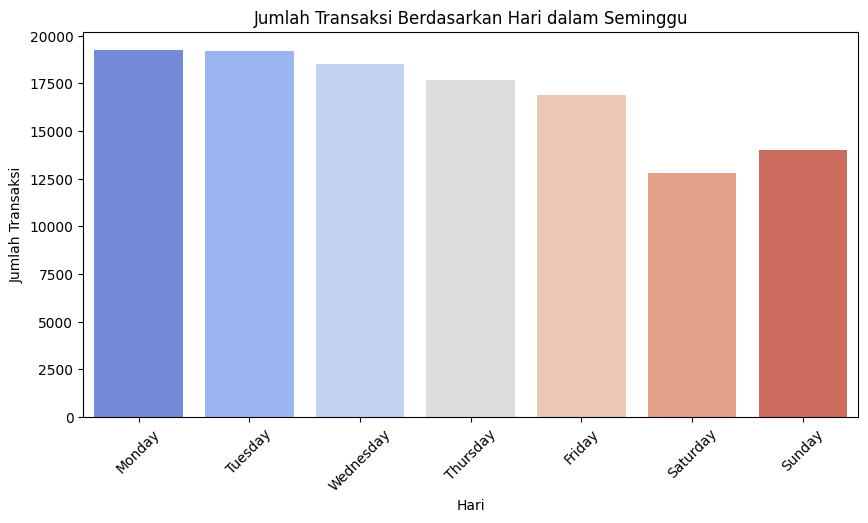

<ipython-input-41-1f12dc8ce8e8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_trend.index, y=month_trend.values, palette='coolwarm')


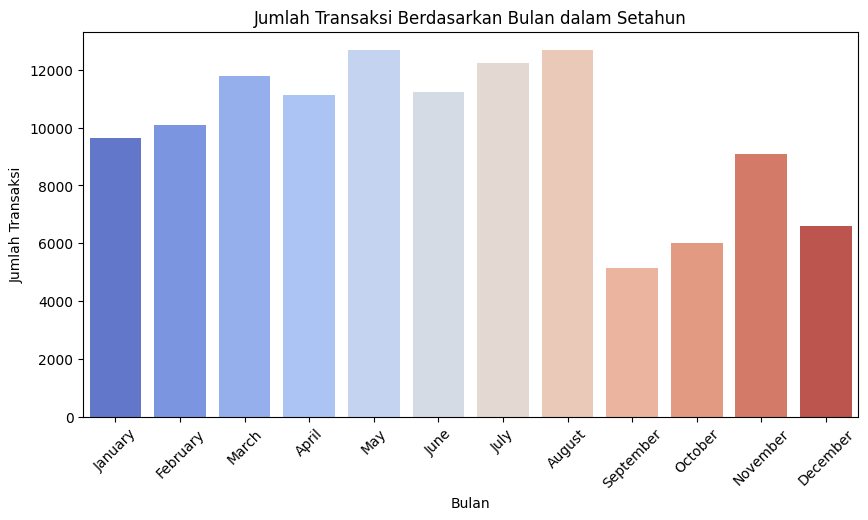

In [41]:
# Visualisasi pola transaksi harian
plt.figure(figsize=(10, 5))
sns.barplot(x=day_trend.index, y=day_trend.values, palette='coolwarm')
plt.title("Jumlah Transaksi Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

# Visualisasi pola transaksi bulanan
plt.figure(figsize=(10, 5))
sns.barplot(x=month_trend.index, y=month_trend.values, palette='coolwarm')
plt.title("Jumlah Transaksi Berdasarkan Bulan dalam Setahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Analisis menunjukkan bahwa transaksi lebih sering terjadi pada hari kerja dibandingkan akhir pekan, diasumsikan karena pelanggan berbelanja saat istirahat kerja. Sebaliknya, transaksi di akhir pekan lebih rendah karena pelanggan lebih fokus pada aktivitas lain. Strategi yang dapat diterapkan adalah meningkatkan promosi dan diskon khusus di akhir pekan untuk mendorong lebih banyak transaksi.  
- Secara musiman, jumlah transaksi cenderung menurun pada September hingga Desember, diasumsikan karena pelanggan lebih berhati-hati dalam pengeluaran pasca-liburan atau kurangnya event besar. Bisnis dapat mengatasi ini dengan kampanye promosi dan diskon menjelang akhir tahun, seperti diskon Natal dan Tahun Baru, untuk meningkatkan penjualan.

### Pertanyaan 2: Apakah ada hubungan antara waktu pengiriman dengan rating review pelanggan?

In [46]:
dataset['order_purchase_timestamp']

,order_purchase_timestamp
0,2017-10-02 10:56:33
1,2017-10-02 10:56:33
2,2017-10-02 10:56:33
3,2018-07-24 20:41:37
4,2018-08-08 08:38:49
...,...
119138,2018-02-06 12:58:58
119139,2017-08-27 14:46:43
119140,2018-01-08 21:28:27
119141,2018-01-08 21:28:27


<ipython-input-50-83faeacafb84>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_vs_rating['review_score'], y=delivery_vs_rating['delivery_days'], palette="coolwarm")


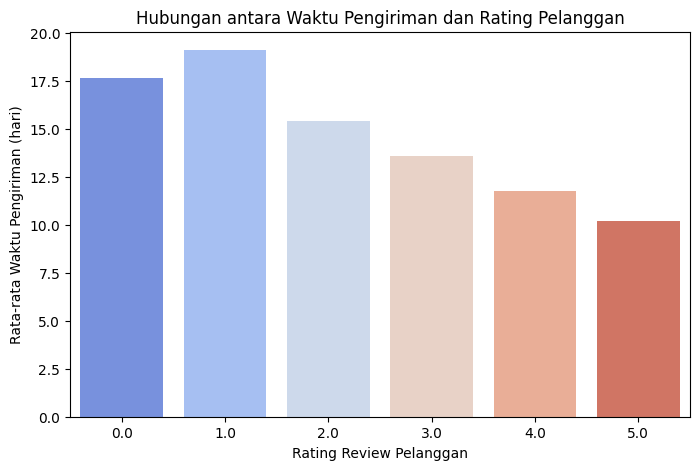

In [50]:
# Hitung durasi pengiriman dalam hari
dataset['delivery_days'] = (dataset['order_delivered_customer_date'] - dataset['order_purchase_timestamp']).dt.days

# Hitung rata-rata waktu pengiriman berdasarkan rating review
delivery_vs_rating = dataset.groupby('review_score')['delivery_days'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=delivery_vs_rating['review_score'], y=delivery_vs_rating['delivery_days'], palette="coolwarm")
plt.xlabel("Rating Review Pelanggan")
plt.ylabel("Rata-rata Waktu Pengiriman (hari)")
plt.title("Hubungan antara Waktu Pengiriman dan Rating Pelanggan")
plt.show()

**Insight:**
- Analisis menunjukkan bahwa semakin lama waktu pengiriman, semakin rendah rating yang diberikan oleh pelanggan. Hal ini mengindikasikan bahwa kecepatan pengiriman memiliki dampak besar terhadap kepuasan pelanggan. Keterlambatan dalam pengiriman dapat menyebabkan pengalaman belanja yang kurang menyenangkan, sehingga menurunkan rating ulasan.
- Untuk meningkatkan kepuasan pelanggan, seller dan penyedia logistik dapat mengoptimalkan proses pengiriman, menawarkan opsi pengiriman ekspres, atau memberikan kompensasi bagi keterlambatan yang tidak terduga.

### Pertanyaan 3: Produk dalam kategori apa yang paling sering dibeli?

In [51]:
# Hitung jumlah transaksi per kategori produk
top_products = dataset['product_category_name'].value_counts().head(10)

In [52]:
top_products

,count
product_category_name,
cama_mesa_banho,13697
beleza_saude,10029
esporte_lazer,9004
moveis_decoracao,8832
informatica_acessorios,8150
utilidades_domesticas,7380
relogios_presentes,6213
telefonia,4726
ferramentas_jardim,4590


<ipython-input-53-ddfcedef85cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="magma")


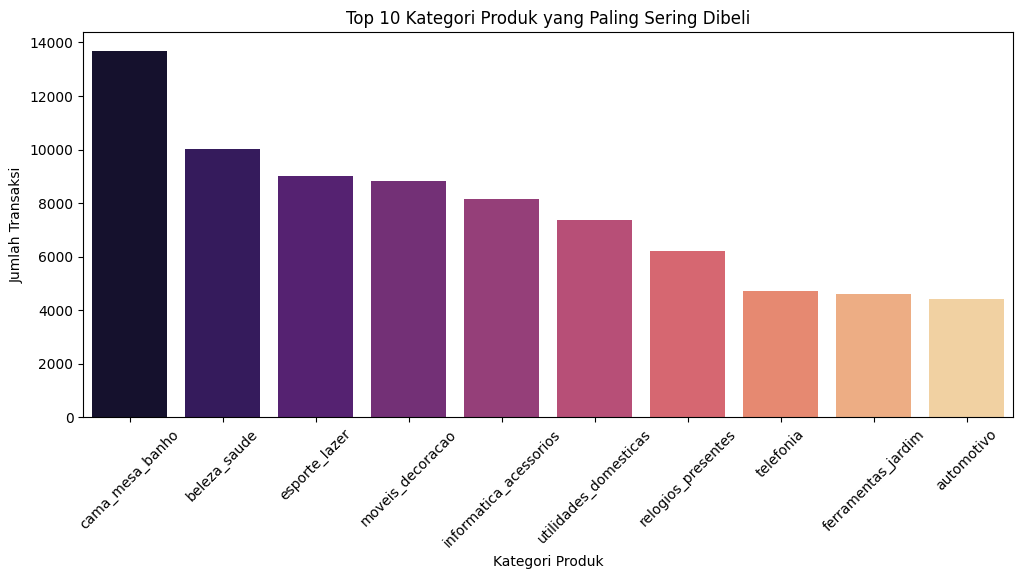

In [53]:
# Visualisasi
plt.figure(figsize=(12,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="magma")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Transaksi")
plt.title("Top 10 Kategori Produk yang Paling Sering Dibeli")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Kategori produk **cama_mesa_banho** memiliki permintaan yang tinggi, menunjukkan bahwa pelanggan cenderung membeli produk dari kategori ini lebih sering dibandingkan kategori lainnya.
- Seller dapat memanfaatkan tren ini dengan meningkatkan stok, menawarkan variasi produk lebih banyak, serta menerapkan strategi pemasaran seperti bundling produk atau memberikan diskon khusus.
- Selain itu, kampanye promosi yang menargetkan pelanggan dengan ketertarikan pada kategori ini dapat membantu meningkatkan volume penjualan lebih lanjut.

## Analisis Lanjutan RFM Analysis

Bagaimana pola pembelian pelanggan berdasarkan Recency, Frequency, dan Monetary?

In [54]:
# Menghitung RFM Analysis
# Tentukan tanggal referensi (misalnya, hari terakhir transaksi dalam data)
reference_date = dataset["order_purchase_timestamp"].max()

# Hitung RFM Metrics
rfm = dataset.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,  # Recency
    "customer_unique_id": "count",  # Frequency
    "price": "sum"  # Monetary
})

# Ubah nama kolom
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Tampilkan 5 baris pertama
print(rfm.head())

                                  Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      115          1    129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      118          1     18.90
0000f46a3911fa3c0805444483337064      541          1     69.00
0000f6ccb0745a6a4b88665a16c9f078      325          1     25.99
0004aac84e0df4da2b147fca70cf8255      292          1    180.00


In [55]:
# Mengelompokkan pelanggan berdasarkan kategori RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=[0, 1, 3, 5, rfm['Frequency'].max()], labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [56]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,4,1,3,8
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,6
0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,4
0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,4
0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,4,7


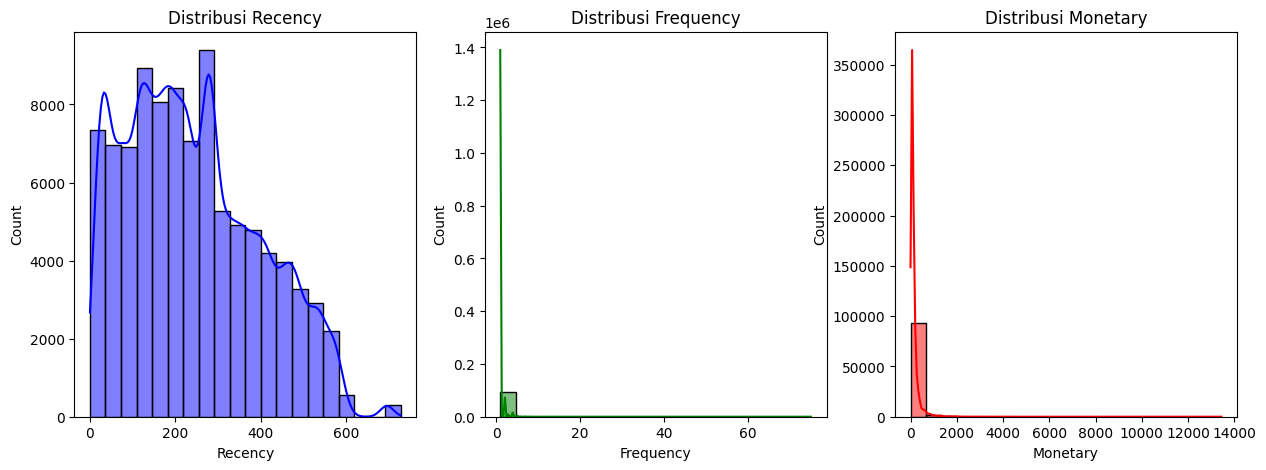

In [57]:
# Visualisasi RFM
plt.figure(figsize=(15, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm["Recency"], bins=20, kde=True, color="blue")
plt.title("Distribusi Recency")

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm["Frequency"], bins=20, kde=True, color="green")
plt.title("Distribusi Frequency")

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm["Monetary"], bins=20, kde=True, color="red")
plt.title("Distribusi Monetary")

plt.show()

Jumlah pelanggan terbaik: 0


<ipython-input-58-f050caea9602>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


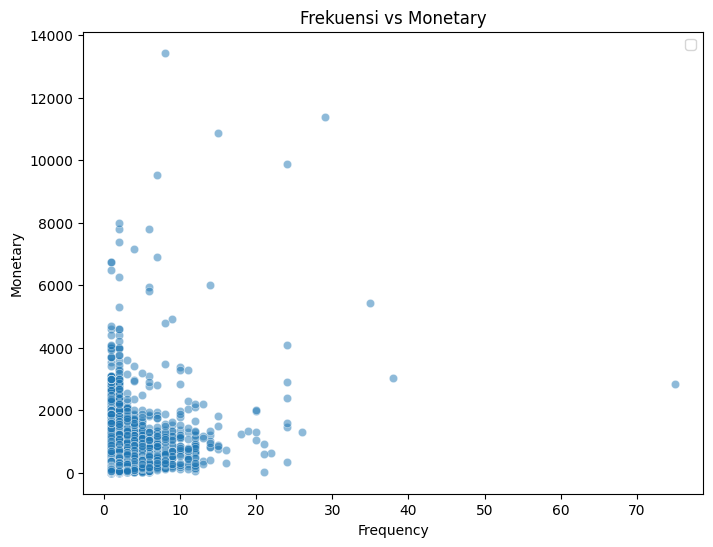

In [58]:
# Identifikasi pelanggan bernilai tinggi (skor RFM 444)
best_customers = rfm[rfm["RFM_Score"] == "444"]
print("Jumlah pelanggan terbaik:", len(best_customers))

# Visualisasi pelanggan berdasarkan Frequency & Monetary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm["Frequency"], y=rfm["Monetary"], alpha=0.5)
sns.scatterplot(x=best_customers["Frequency"], y=best_customers["Monetary"], color="red", label="Pelanggan Terbaik")
plt.title("Frekuensi vs Monetary")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.legend()
plt.show()


**Insight:**
- RFM Analysis menunjukkan pola pembelian pelanggan di mana pelanggan dengan RFM Score tinggi (444) memiliki frekuensi pembelian tinggi, transaksi terbaru, dan pengeluaran besar.
- Mayoritas pendapatan berasal dari pelanggan dengan Monetary tinggi.
Pelanggan dengan Frequency rendah tetapi Monetary tinggi dapat dijadikan target untuk produk premium.

## Conclusion

### Conclusion pertanyaan 1: Pola Transaksi Berdasarkan Waktu

📊 Kesimpulan:
- Transaksi lebih sering terjadi pada hari kerja dibandingkan akhir pekan, diasumsikan karena pelanggan lebih aktif berbelanja saat jam istirahat kerja. Sebaliknya, transaksi akhir pekan lebih rendah, kemungkinan karena pelanggan menghabiskan waktu dengan keluarga atau aktivitas lain.
- Secara musiman, jumlah transaksi mengalami penurunan pada bulan September hingga Desember, yang diasumsikan akibat pengeluaran pelanggan yang lebih terkontrol setelah liburan panjang atau karena tidak adanya event besar yang mendorong belanja.

💡 Insight dan Strategi Bisnis:
- Optimalkan Promosi di Akhir Pekan → Karena transaksi lebih rendah di akhir pekan, bisnis bisa menawarkan diskon eksklusif di Sabtu & Minggu, seperti promo “Weekend Sale” untuk menarik lebih banyak pelanggan.
- Manfaatkan Periode September-Desember → Kampanye seperti diskon Natal & Tahun Baru, atau program cashback menjelang akhir tahun dapat meningkatkan minat belanja pelanggan.
- Strategi Payday Campaign → Karena transaksi cenderung meningkat saat pelanggan menerima gaji, bisnis dapat menjalankan promosi besar di awal dan akhir bulan untuk memanfaatkan momen ini.

### Conclusion pertanyaan 2: Hubungan Waktu Pengiriman dengan Rating Review

📊 Kesimpulan:
- Semakin lama waktu pengiriman, semakin rendah rating ulasan pelanggan. Ini menunjukkan bahwa kecepatan pengiriman berdampak besar pada kepuasan pelanggan.
- Keterlambatan pengiriman dapat menyebabkan pengalaman belanja yang buruk, yang berpotensi menurunkan loyalitas pelanggan dan kepercayaan terhadap brand.

💡 Insight dan Strategi Bisnis:
- Optimasi Proses Logistik → Seller dan penyedia logistik dapat meningkatkan efisiensi pengiriman dengan bekerja sama dengan lebih banyak jasa ekspedisi atau menambahkan opsi pengiriman ekspres.
- Transparansi Waktu Pengiriman → Memberikan perkiraan waktu pengiriman yang lebih akurat dan notifikasi real-time kepada pelanggan agar mereka lebih puas dengan layanan.
- Kompensasi untuk Keterlambatan → Jika pengiriman terlambat, menawarkan voucher diskon atau cashback kecil bisa meningkatkan loyalitas pelanggan dan menjaga kepuasan mereka.



### Conclusion pertanyaan 3: Produk yang Paling Sering Dibeli oleh Pelanggan

📊 Kesimpulan:
- Kategori produk cama_mesa_banho memiliki permintaan tertinggi, menunjukkan bahwa pelanggan lebih sering membeli produk dari kategori ini dibandingkan kategori lainnya.

💡 Insight dan Strategi Bisnis:
- Fokus pada Produk dengan Permintaan Tinggi → Seller bisa meningkatkan stok dan variasi produk di kategori ini untuk memenuhi permintaan pasar yang tinggi.
- Strategi Bundling & Diskon → Menawarkan paket bundling atau diskon untuk pembelian lebih dari satu item dalam kategori ini dapat meningkatkan nilai transaksi pelanggan.
- Targeted Marketing → Kampanye pemasaran bisa lebih difokuskan pada pelanggan yang sering membeli dari kategori ini, misalnya melalui email marketing atau rekomendasi produk yang dipersonalisasi.